<a href="https://colab.research.google.com/github/giovanni-lucarelli/basket/blob/main/assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [10]:
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import itertools

# Import classification algorithms
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Import evaluation algorithms
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc


In [9]:
url = "https://raw.githubusercontent.com/giovanni-lucarelli/basket/main/basket_processed.csv"
df = pd.read_csv(url)

## Assessment
The assessment is made with the default models, without fine-tuning.
Fine-tuning all the possible parameters would take a looooong time.

In [41]:
# List of models
models = [
    RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20),
    BernoulliNB(),
    DummyClassifier(),
    KNeighborsClassifier(n_neighbors=60, weights='distance'),
    SVC(probability=True)
]

# Dictionary to store accuracies for each model
model_accuracies = {}

# Loop through models
for model in models:
    model_name = type(model).__name__  # Get the model's name
    model_accuracies[model_name] = []  # Initialize an empty list for accuracies

    target_years = df['GAME_DATE_EST'].str.split('-').str[0].astype(int)

    for year in range(min(target_years) + 1, max(target_years) + 1):

        # Rolling origin forecasting (for validation)
        X_train = df[target_years < year]
        y_train = X_train['HOME_WINS']
        X_train = X_train.drop(columns=['HOME_WINS', 'GAME_DATE_EST'])

        # Only test on `year`
        X_test = df[target_years == year]
        y_test = X_test['HOME_WINS']
        X_test = X_test.drop(columns=['HOME_WINS', 'GAME_DATE_EST'])

        # Train the model
        model.fit(X_train, y_train)

        # Test the model
        y_pred = model.predict(X_test)

        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        model_accuracies[model_name].append(acc)

        print(f"{model_name} - Accuracy for year {year}: {acc}")

# Print overall results
for model_name, accuracies in model_accuracies.items():
    print(f"\n{model_name} - Average Accuracy: {sum(accuracies) / len(accuracies):.4f}")


RandomForestClassifier - Accuracy for year 2004: 0.6031007751937985
RandomForestClassifier - Accuracy for year 2005: 0.5853658536585366
RandomForestClassifier - Accuracy for year 2006: 0.6237077877325982
RandomForestClassifier - Accuracy for year 2007: 0.5982905982905983
RandomForestClassifier - Accuracy for year 2008: 0.6248266296809986
RandomForestClassifier - Accuracy for year 2009: 0.6519607843137255
RandomForestClassifier - Accuracy for year 2010: 0.6131284916201117
RandomForestClassifier - Accuracy for year 2011: 0.6404371584699453
RandomForestClassifier - Accuracy for year 2012: 0.6531645569620254
RandomForestClassifier - Accuracy for year 2013: 0.63268156424581
RandomForestClassifier - Accuracy for year 2014: 0.611380985426787
RandomForestClassifier - Accuracy for year 2015: 0.616631430584919
RandomForestClassifier - Accuracy for year 2016: 0.6088173547935619
RandomForestClassifier - Accuracy for year 2017: 0.6062103034580099
RandomForestClassifier - Accuracy for year 2018: 0.6

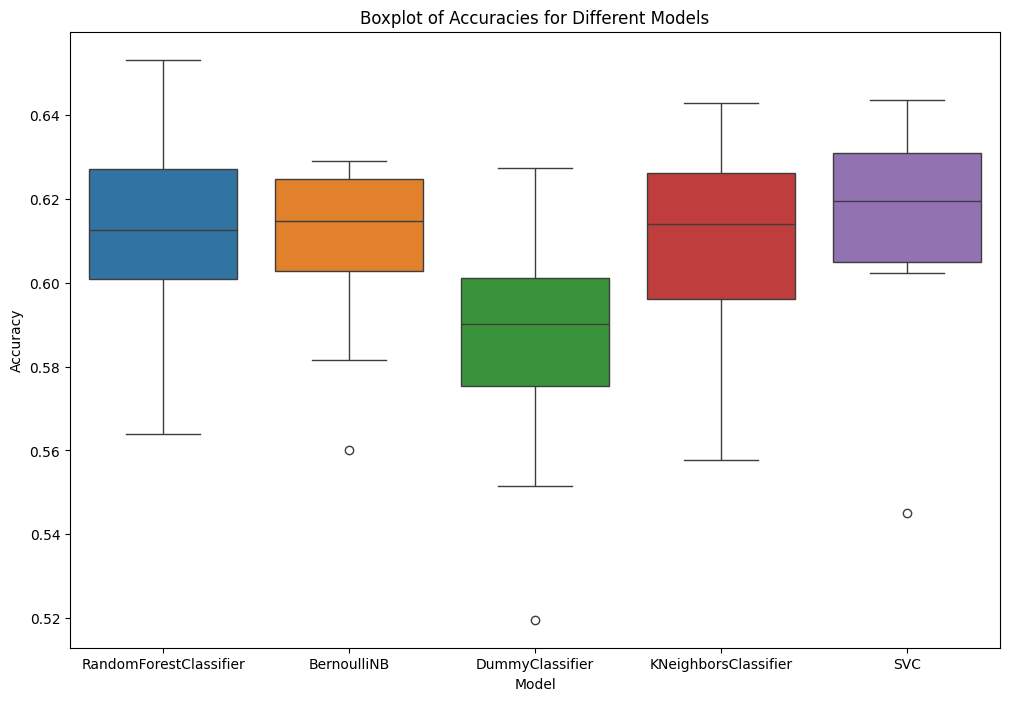

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.DataFrame(model_accuracies))
plt.title('Boxplot of Accuracies for Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [ ]:
'''
TODO:

1. Statistical significance testing to see which is the best learning
technique. Under normality assumption we can do a t-test for the mean value
of the 5 accuracies vectors.

2. Use different metric to compare the learning techniques such as roc-auc (?)
'''